In [3]:
import cv2 # OpenCV
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.color import rgb2gray

In [4]:
def mostrar(imagem, imagem_cinza=False):
  fig = plt.gcf()
  fig.set_size_inches(18,6)
  if imagem_cinza:
    plt.imshow(imagem, cmap='gray')
  else:
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14634  100 14634    0     0  32304      0 --:--:-- --:--:-- --:--:-- 32304


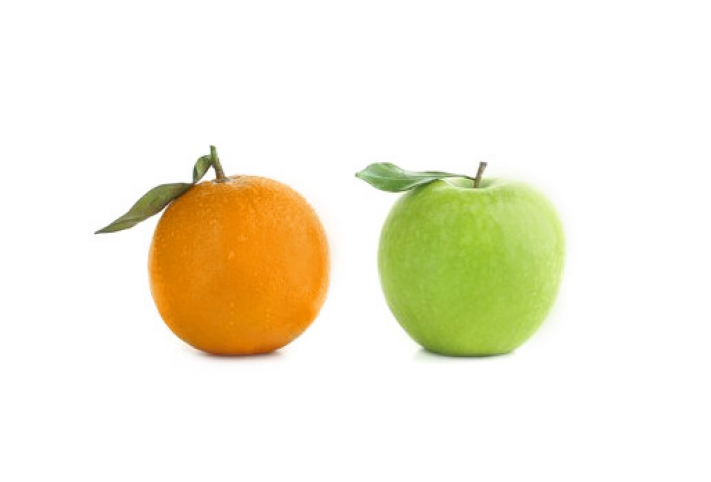

In [5]:
!curl -o paisagem01.jpg https://mosaicweb.com.br/images/aula_imagens/frutas.jpg
img = cv2.imread('paisagem01.jpg', cv2.IMREAD_UNCHANGED)
mostrar(img)

In [6]:
img.shape

(334, 500, 3)

In [7]:
334 * 500

167000

In [8]:
vetorizado = img.reshape((-1, 3))
vetorizado.shape

(167000, 3)

In [9]:
vetorizado = np.float32(vetorizado)

In [10]:
criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)


In [11]:
ret, label, centros = cv2.kmeans(vetorizado, 3, None, criterio, 10, 
cv2.KMEANS_RANDOM_CENTERS)


In [12]:
centros = np.uint8(centros)
centros
print(centros)

[[ 14 133 225]
 [ 84 190 166]
 [254 255 255]]


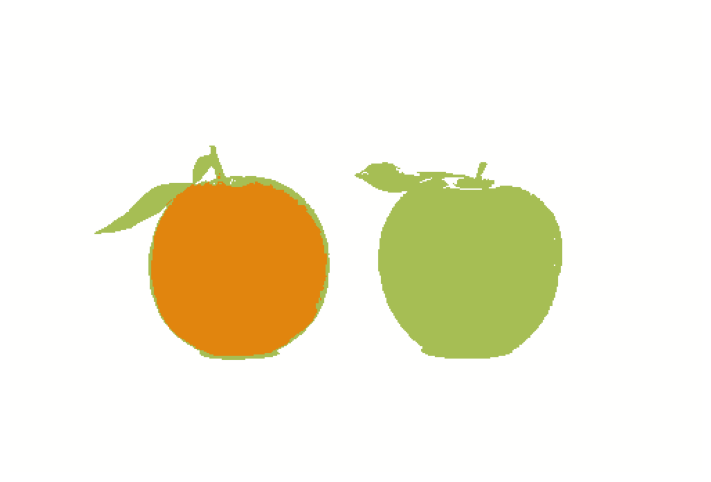

In [ ]:
img_final = centros[label.flatten()]
img_final = img_final.reshape(img.shape)
img_final.shape
mostrar(img_final)